In [27]:
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings('ignore')


In [28]:
df= pd.read_csv("customer_shopping_data.csv")
df.head()

,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall
0,I138884,C241288,Female,28,Clothing,5,1500.40,Credit Card,05-08-2022,Kanyon
1,I317333,C111565,Male,21,Shoes,3,1800.51,Debit Card,12-12-2021,Forum Istanbul
2,I127801,C266599,Male,20,Clothing,1,300.08,Cash,09-11-2021,Metrocity
3,I173702,C988172,Female,66,Shoes,5,3000.85,Credit Card,16-05-2021,Metropol AVM
4,I337046,C189076,Female,53,Books,4,60.60,Cash,24-10-2021,Kanyon


In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99457 entries, 0 to 99456
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   invoice_no      99457 non-null  object 
 1   customer_id     99457 non-null  object 
 2   gender          99457 non-null  object 
 3   age             99457 non-null  int64  
 4   category        99457 non-null  object 
 5   quantity        99457 non-null  int64  
 6   price           99457 non-null  float64
 7   payment_method  99457 non-null  object 
 8   invoice_date    99457 non-null  object 
 9   shopping_mall   99457 non-null  object 
dtypes: float64(1), int64(2), object(7)
memory usage: 7.6+ MB


In [30]:
df.shape

(99457, 10)

In [31]:
df.describe()

,age,quantity,price
count,99457.000000,99457.000000,99457.000000
mean,43.427089,3.003429,689.256321
std,14.990054,1.413025,941.184567
min,18.000000,1.000000,5.230000
25%,30.000000,2.000000,45.450000
50%,43.000000,3.000000,203.300000
75%,56.000000,4.000000,1200.320000
max,69.000000,5.000000,5250.000000


In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99457 entries, 0 to 99456
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   invoice_no      99457 non-null  object 
 1   customer_id     99457 non-null  object 
 2   gender          99457 non-null  object 
 3   age             99457 non-null  int64  
 4   category        99457 non-null  object 
 5   quantity        99457 non-null  int64  
 6   price           99457 non-null  float64
 7   payment_method  99457 non-null  object 
 8   invoice_date    99457 non-null  object 
 9   shopping_mall   99457 non-null  object 
dtypes: float64(1), int64(2), object(7)
memory usage: 7.6+ MB


In [33]:
df.drop_duplicates(inplace=True) # to check for any  duplicates
df.shape

(99457, 10)

In [34]:
df.columns

Index(['invoice_no', 'customer_id', 'gender', 'age', 'category', 'quantity',
       'price', 'payment_method', 'invoice_date', 'shopping_mall'],
      dtype='object')

In [35]:
df.nunique()

invoice_no        99457
customer_id       99457
gender                2
age                  52
category              8
quantity              5
price                40
payment_method        3
invoice_date        797
shopping_mall        10
dtype: int64

In [36]:
print(df["gender"].value_counts())
print('\n' )
print(df["category"].value_counts())
print('\n' )


Female    59482
Male      39975
Name: gender, dtype: int64


Clothing           34487
Cosmetics          15097
Food & Beverage    14776
Toys               10087
Shoes              10034
Souvenir            4999
Technology          4996
Books               4981
Name: category, dtype: int64




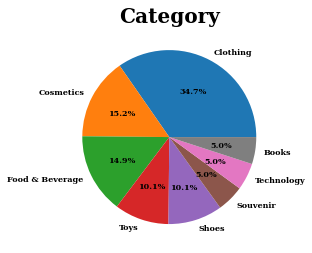

In [37]:
plt.pie(df['category'].value_counts(),labels=df['category'].value_counts().index, autopct='%1.1f%%', textprops={ 'fontsize': 8,
                                           'color': 'black',
                                           'weight': 'bold',
                                           'family': 'serif' }) 
hfont = {'fontname':'serif', 'weight': 'bold'}
plt.title('Category', size=20, **hfont) 
plt.show()

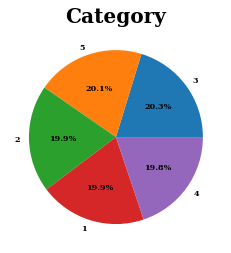

In [38]:
plt.pie(df['quantity'].value_counts(),labels=df['quantity'].value_counts().index, autopct='%1.1f%%', textprops={ 'fontsize': 8,
                                           'color': 'black',
                                           'weight': 'bold',
                                           'family': 'serif' }) 
hfont = {'fontname':'serif', 'weight': 'bold'}
plt.title('Category', size=20, **hfont) 
plt.show()

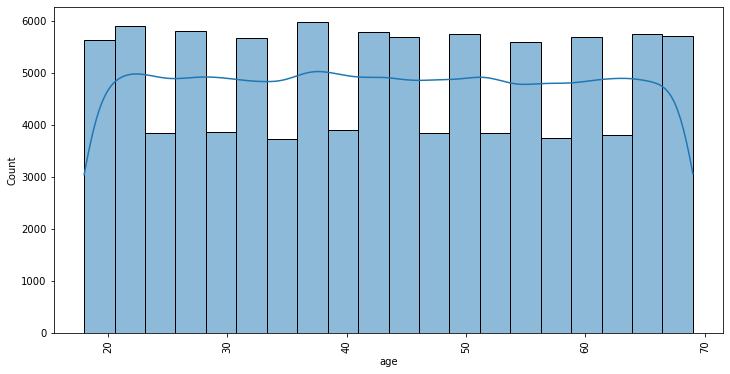

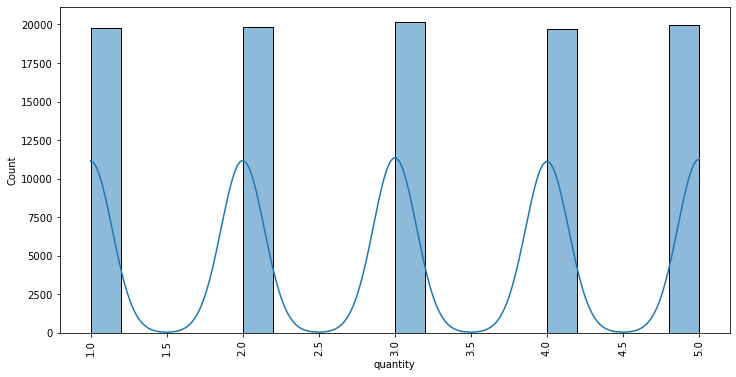

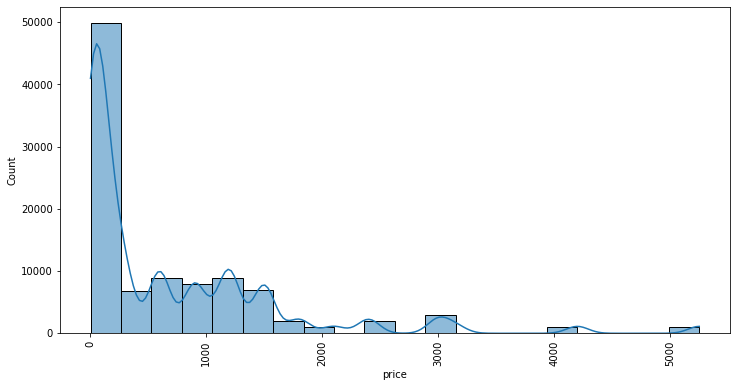

In [44]:
numerical_cols = df.select_dtypes(include=['int64','float64']).columns.tolist()
object_cols= df.select_dtypes(include=['object']).columns.tolist()
for i in numerical_cols:
    plt.figure(figsize=(12,6))
    sns.histplot(df[i],kde = True,bins=20,palette='his')
    plt.xticks(rotation=90)
    plt.show()

In [ ]:
PREPOCCESSING DATA 


In [47]:
data=pd.get_dummies(df,columns=['gender','category','payment_method','shopping_mall'])
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99457 entries, 0 to 99456
Data columns (total 29 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   invoice_no                       99457 non-null  object 
 1   customer_id                      99457 non-null  object 
 2   age                              99457 non-null  int64  
 3   quantity                         99457 non-null  int64  
 4   price                            99457 non-null  float64
 5   invoice_date                     99457 non-null  object 
 6   gender_Female                    99457 non-null  uint8  
 7   gender_Male                      99457 non-null  uint8  
 8   category_Books                   99457 non-null  uint8  
 9   category_Clothing                99457 non-null  uint8  
 10  category_Cosmetics               99457 non-null  uint8  
 11  category_Food & Beverage         99457 non-null  uint8  
 12  category_Shoes    

In [50]:
df_clean = data.drop(['invoice_no','customer_id','invoice_date'],axis=1)
df_clean.columns

Index(['age', 'quantity', 'price', 'gender_Female', 'gender_Male',
       'category_Books', 'category_Clothing', 'category_Cosmetics',
       'category_Food & Beverage', 'category_Shoes', 'category_Souvenir',
       'category_Technology', 'category_Toys', 'payment_method_Cash',
       'payment_method_Credit Card', 'payment_method_Debit Card',
       'shopping_mall_Cevahir AVM', 'shopping_mall_Emaar Square Mall',
       'shopping_mall_Forum Istanbul', 'shopping_mall_Istinye Park',
       'shopping_mall_Kanyon', 'shopping_mall_Mall of Istanbul',
       'shopping_mall_Metrocity', 'shopping_mall_Metropol AVM',
       'shopping_mall_Viaport Outlet', 'shopping_mall_Zorlu Center'],
      dtype='object')

In [51]:
df_corr= df_clean.corr()
df_corr

,age,quantity,price,gender_Female,gender_Male,category_Books,category_Clothing,category_Cosmetics,category_Food & Beverage,category_Shoes,...,shopping_mall_Cevahir AVM,shopping_mall_Emaar Square Mall,shopping_mall_Forum Istanbul,shopping_mall_Istinye Park,shopping_mall_Kanyon,shopping_mall_Mall of Istanbul,shopping_mall_Metrocity,shopping_mall_Metropol AVM,shopping_mall_Viaport Outlet,shopping_mall_Zorlu Center
age,1.000000,0.000667,0.001694,0.002150,-0.002150,0.001758,-0.000868,0.004334,-0.002025,0.000623,...,-0.003904,0.002024,0.001685,-0.000958,0.002392,0.000447,0.002031,-0.004821,-0.001949,0.001626
quantity,0.000667,1.000000,0.344880,0.000131,-0.000131,0.000715,-0.000318,0.002424,-0.002034,0.001904,...,-0.001340,0.001708,-0.000195,0.002114,-0.001424,0.003850,-0.003786,0.000286,-0.001407,-0.000272
price,0.001694,0.344880,1.000000,-0.001450,0.001450,-0.157036,0.163976,-0.254765,-0.298954,0.397954,...,-0.000313,0.003704,-0.003620,-0.000880,0.001274,0.002826,-0.002878,-0.002312,0.001332,0.000567
gender_Female,0.002150,0.000131,-0.001450,1.000000,-1.000000,-0.006861,0.001140,0.002342,-0.001905,-0.002316,...,-0.004223,-0.003374,0.005411,0.001674,0.002593,-0.001294,-0.002096,0.004539,0.000955,-0.006262
gender_Male,-0.002150,-0.000131,0.001450,-1.000000,1.000000,0.006861,-0.001140,-0.002342,0.001905,0.002316,...,0.004223,0.003374,-0.005411,-0.001674,-0.002593,0.001294,0.002096,-0.004539,-0.000955,0.006262
category_Books,0.001758,0.000715,-0.157036,-0.006861,0.006861,1.000000,-0.167290,-0.097135,-0.095914,-0.076915,...,0.001698,-0.001062,0.000900,-0.004312,0.002334,0.003018,0.000028,-0.005005,-0.000022,0.001432
category_Clothing,-0.000868,-0.000318,0.163976,0.001140,-0.001140,-0.167290,1.000000,-0.308211,-0.304338,-0.244053,...,-0.000159,-0.001696,0.001323,-0.002738,-0.001781,0.000407,0.003712,0.000115,0.000395,0.000118
category_Cosmetics,0.004334,0.002424,-0.254765,0.002342,-0.002342,-0.097135,-0.308211,1.000000,-0.176711,-0.141706,...,-0.003286,0.003881,0.002458,-0.002512,0.000981,0.001593,-0.001063,-0.000128,-0.001541,-0.000809
category_Food & Beverage,-0.002025,-0.002034,-0.298954,-0.001905,0.001905,-0.095914,-0.304338,-0.176711,1.000000,-0.139926,...,0.003950,-0.002998,-0.002986,0.003500,-0.002550,-0.000414,0.001095,0.000692,0.000384,-0.000511
category_Shoes,0.000623,0.001904,0.397954,-0.002316,0.002316,-0.076915,-0.244053,-0.141706,-0.139926,1.000000,...,-0.002069,0.001965,-0.006310,0.001594,0.001429,0.000917,-0.005355,0.005388,0.000191,0.001061


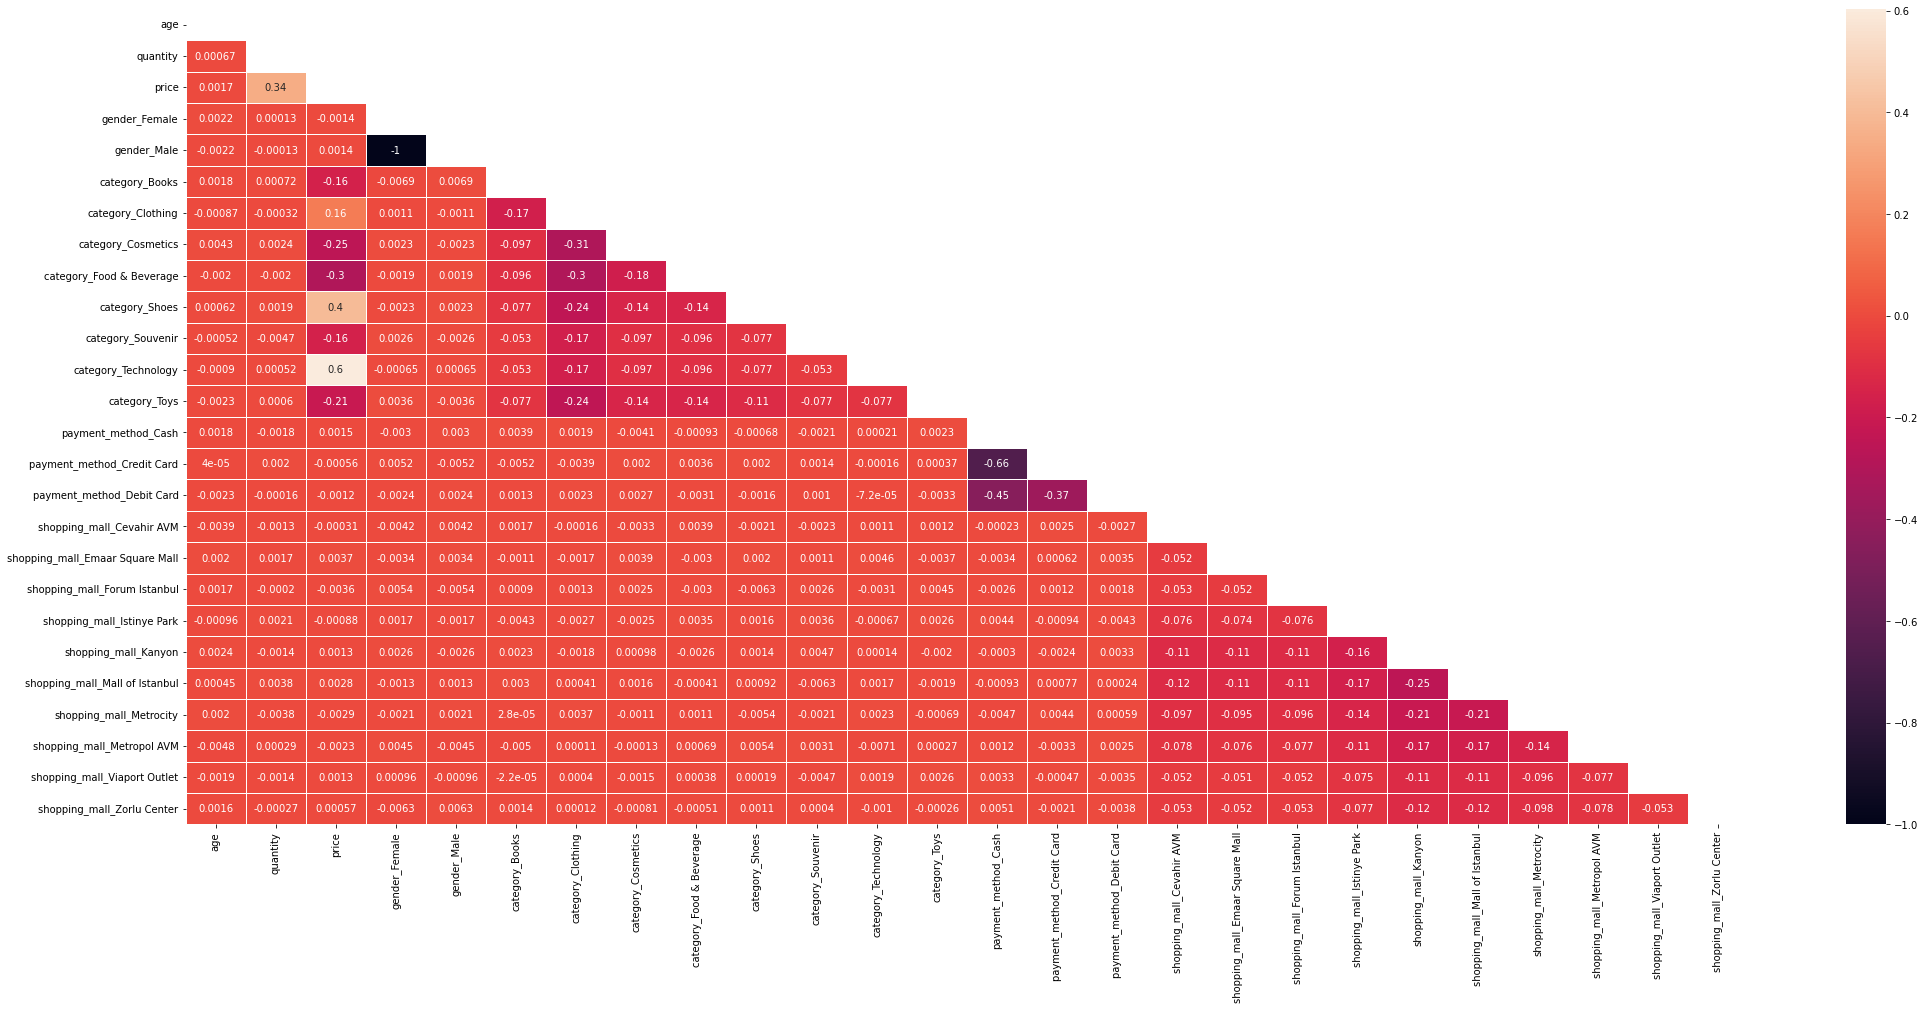

In [55]:
plt.figure(figsize=(35,15))
matrix=np.triu(df_corr)
sns.heatmap(df_corr,annot=True,linewidth=.8,mask=matrix,cmap="rocket");
plt.show()

In [57]:
corr = df_corr
high_corr_features = set()
for i in range(len(corr.columns)):
    for j in range(i):
        if abs(corr.iloc[i, j]) >= 0.1:
            high_corr_features.add((corr.columns[i], corr.columns[j], corr.iloc[i, j]))

# Print highly correlated features
for feature_pair in high_corr_features:
    print(feature_pair)

('category_Toys', 'category_Clothing', -0.2447689960736651)
('shopping_mall_Zorlu Center', 'shopping_mall_Kanyon', -0.11569347353925402)
('shopping_mall_Metrocity', 'shopping_mall_Kanyon', -0.21035396188678884)
('payment_method_Debit Card', 'payment_method_Cash', -0.45208632228464174)
('shopping_mall_Metropol AVM', 'shopping_mall_Mall of Istanbul', -0.1689373459404173)
('shopping_mall_Metropol AVM', 'shopping_mall_Kanyon', -0.168301368823485)
('shopping_mall_Mall of Istanbul', 'shopping_mall_Cevahir AVM', -0.11511435003055782)
('shopping_mall_Kanyon', 'shopping_mall_Istinye Park', -0.16477409703833323)
('shopping_mall_Metrocity', 'shopping_mall_Istinye Park', -0.1392415298731586)
('category_Shoes', 'category_Clothing', -0.24405274998490123)
('shopping_mall_Metrocity', 'shopping_mall_Mall of Istanbul', -0.21114884731851244)
('shopping_mall_Zorlu Center', 'shopping_mall_Mall of Istanbul', -0.11613065597136397)
('category_Toys', 'category_Food & Beverage', -0.14033648147692132)
('shopping

In [60]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
X = df_clean[['age', 'quantity', 'price', 'gender_Female', 'gender_Male',
       'category_Books', 'category_Clothing', 'category_Cosmetics',
       'category_Food & Beverage', 'category_Shoes', 'category_Souvenir',
       'category_Technology', 'category_Toys', 'payment_method_Cash',
       'payment_method_Credit Card', 'payment_method_Debit Card',
       'shopping_mall_Cevahir AVM', 'shopping_mall_Emaar Square Mall',
       'shopping_mall_Forum Istanbul', 'shopping_mall_Istinye Park',
       'shopping_mall_Kanyon', 'shopping_mall_Mall of Istanbul',
       'shopping_mall_Metrocity', 'shopping_mall_Metropol AVM',
       'shopping_mall_Viaport Outlet', 'shopping_mall_Zorlu Center']]
 # Standardize data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply PCA
pca = PCA(n_components=10)
X_pca = pca.fit_transform(X_scaled)
pca

PCA(n_components=10)

In [61]:
X_pca

array([[ 0.87342432,  1.48450868,  1.431028  , ..., -0.12186614,
        -0.50682889, -0.16777109],
       [ 2.09430708, -1.22609045,  0.55481824, ...,  0.13252462,
         0.90908807,  0.49820605],
       [ 0.2073977 , -1.76604787, -1.33162954, ...,  0.22310399,
        -1.66302534,  0.13432021],
       ...,
       [-0.88122091, -2.03844843,  0.54873611, ..., -1.81371115,
        -1.72761728, -0.86196185],
       [ 4.93107537, -0.53178483, -1.31695959, ...,  0.10133129,
         0.77639928, -0.60956038],
       [-1.4095042 ,  0.88958897,  1.46268937, ...,  0.25918041,
        -0.51705066,  0.52516519]])

n_clusters: 1, WCSS: 1420183.4193081125
n_clusters: 2, WCSS: 1221275.1235092115
n_clusters: 3, WCSS: 1101112.1229606722
n_clusters: 4, WCSS: 1011917.4179090175
n_clusters: 5, WCSS: 924368.33149363
n_clusters: 6, WCSS: 872986.3571744978
n_clusters: 7, WCSS: 820426.0604188532
n_clusters: 8, WCSS: 781422.56706281
n_clusters: 9, WCSS: 748733.2015289167
n_clusters: 10, WCSS: 724016.5124510829


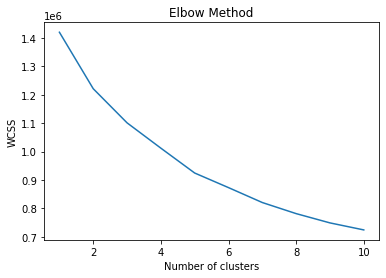

In [62]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X_pca)
    wcss.append(kmeans.inertia_)
    print(f"n_clusters: {i}, WCSS: {kmeans.inertia_}")
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [63]:
kmeans = KMeans(n_clusters=4, init='k-means++', random_state=42)
kmeans.fit(X_pca)

KMeans(n_clusters=4, random_state=42)

In [65]:
data_new = df_clean.copy()
data_new.columns

Index(['age', 'quantity', 'price', 'gender_Female', 'gender_Male',
       'category_Books', 'category_Clothing', 'category_Cosmetics',
       'category_Food & Beverage', 'category_Shoes', 'category_Souvenir',
       'category_Technology', 'category_Toys', 'payment_method_Cash',
       'payment_method_Credit Card', 'payment_method_Debit Card',
       'shopping_mall_Cevahir AVM', 'shopping_mall_Emaar Square Mall',
       'shopping_mall_Forum Istanbul', 'shopping_mall_Istinye Park',
       'shopping_mall_Kanyon', 'shopping_mall_Mall of Istanbul',
       'shopping_mall_Metrocity', 'shopping_mall_Metropol AVM',
       'shopping_mall_Viaport Outlet', 'shopping_mall_Zorlu Center'],
      dtype='object')

In [ ]:
 #Model Selection, Model Traing and Evaluation

In [66]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Splitting the data into training and test sets
X = data_new.drop('price', axis=1)
y = data_new['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

# Creating a list of regression models to test
models = [LinearRegression(), DecisionTreeRegressor(), RandomForestRegressor()]

# Creating a list of model names for display purposes
model_names = ['Linear Regression', 'Decision Tree', 'Random Forest']

# Looping through the models and printing the performance metrics for each
for i, model in enumerate(models):
    print(model_names[i] + ':')
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print('MSE: ', mean_squared_error(y_test, y_pred))
    print('R-squared: ', r2_score(y_test, y_pred))
    print('------------------------------------')

Linear Regression:
MSE:  3.226045997003836e+27
R-squared:  -3.5775420347771855e+21
------------------------------------
Decision Tree:
MSE:  3.1779175421394172e-21
R-squared:  1.0
------------------------------------
Random Forest:
MSE:  3.617888201390881e-22
R-squared:  1.0
------------------------------------


In [67]:
from sklearn.linear_model import LogisticRegression
X_train, X_test, y_train, y_test = train_test_split(data_new.drop('payment_method_Cash', axis=1),
                                                    data_new['payment_method_Cash'], test_size=0.2,
                                                    random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

# train a logistic regression model
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

from sklearn.metrics import accuracy_score

# predict on test set and calculate accuracy
y_pred = logreg.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 1.0


In [68]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# Create Decision Tree classifier with max depth of 3
dt = DecisionTreeClassifier(max_depth=3)

# Train the classifier
dt.fit(X_train, y_train)

# Make predictions on the test set
y_pred = dt.predict(X_test)

# Evaluate accuracy
acc = accuracy_score(y_test, y_pred)
print("Decision Tree Accuracy:", acc)

# Create Random Forest classifier with 100 trees
rf = RandomForestClassifier(n_estimators=100)

# Train the classifier
rf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf.predict(X_test)

# Evaluate accuracy
acc = accuracy_score(y_test, y_pred)
print("Random Forest Accuracy:", acc)

Decision Tree Accuracy: 1.0
Random Forest Accuracy: 1.0


In [69]:
data_new.columns

Index(['age', 'quantity', 'price', 'gender_Female', 'gender_Male',
       'category_Books', 'category_Clothing', 'category_Cosmetics',
       'category_Food & Beverage', 'category_Shoes', 'category_Souvenir',
       'category_Technology', 'category_Toys', 'payment_method_Cash',
       'payment_method_Credit Card', 'payment_method_Debit Card',
       'shopping_mall_Cevahir AVM', 'shopping_mall_Emaar Square Mall',
       'shopping_mall_Forum Istanbul', 'shopping_mall_Istinye Park',
       'shopping_mall_Kanyon', 'shopping_mall_Mall of Istanbul',
       'shopping_mall_Metrocity', 'shopping_mall_Metropol AVM',
       'shopping_mall_Viaport Outlet', 'shopping_mall_Zorlu Center'],
      dtype='object')

In [70]:
df2 = df[['gender', 'age', 'category', 'quantity', 'price', 'payment_method', 'shopping_mall']]
df3 = df2[0:20000]

In [71]:
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.preprocessing import LabelEncoder
# Convert categorical columns to numerical using label encoding
label_encoder = LabelEncoder()
df3['gender'] = label_encoder.fit_transform(df3['gender'])
df3['category'] = label_encoder.fit_transform(df3['category'])
df3['payment_method'] = label_encoder.fit_transform(df3['payment_method'])
df3['shopping_mall'] = label_encoder.fit_transform(df3['shopping_mall'])
# Calculate the similarity matrix
similarity_matrix = cosine_similarity(df3)
similarity_matrix

array([[1.        , 0.99997147, 0.99869509, ..., 0.98227221, 0.98328954,
        0.95878028],
       [0.99997147, 1.        , 0.99831054, ..., 0.98092233, 0.98205064,
        0.95678783],
       [0.99869509, 0.99831054, 1.        , ..., 0.99013547, 0.99098724,
        0.97169813],
       ...,
       [0.98227221, 0.98092233, 0.99013547, ..., 1.        , 0.99763049,
        0.99384684],
       [0.98328954, 0.98205064, 0.99098724, ..., 0.99763049, 1.        ,
        0.99378744],
       [0.95878028, 0.95678783, 0.97169813, ..., 0.99384684, 0.99378744,
        1.        ]])

In [72]:
# Get the index of the user
user_index = df3.index[-1]

# Get the similarity scores for all customers with respect to the user
similarity_scores = list(enumerate(similarity_matrix[user_index]))

# Sort the similarity scores in descending order
sorted_scores = sorted(similarity_scores, key=lambda x: x[1], reverse=True)

# Get the top 5 most similar customers
top_similar_customers = [i[0] for i in sorted_scores[1:6]]

# Get the products bought by the top 5 similar customers
recommended_products = df3.loc[top_similar_customers, 'category'].value_counts().index.tolist()[:5]

print("Recommended products based on your preferences:")
print(recommended_products)

Recommended products based on your preferences:
[7]
